<h3>Definitions</h3>

**Price**
$P_t$

**Net Returns**
$R_t = \frac{P_t}{P_{t-1}} - 1 = \frac{P_t - P_{t-1}}{P_{t-1}}$

**Gross Returns**
$\frac{P_t}{P_{t-1}} = 1 + R_t$

**Gross return over the most recent k periods**
$ 1 + R_t(k) = \displaystyle\prod_{n=0}^{k-1} \frac{P_{t-n}}{P_{t-1-n}} = \frac{P_t}{P_{t-1}}\frac{P_{t-1}}{P_{t-2}} ... \frac{P_{t-k+1}}{P_{t-k}}$

**Log Price**
$p_t = log(P_t)$

**Log Returns a.k.a. Continuously Compounded Returns**
$ r_t = log(1+R_t) = log(\frac{P_t}{P_{t-1}}) = p_t - p_{t-1}$

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

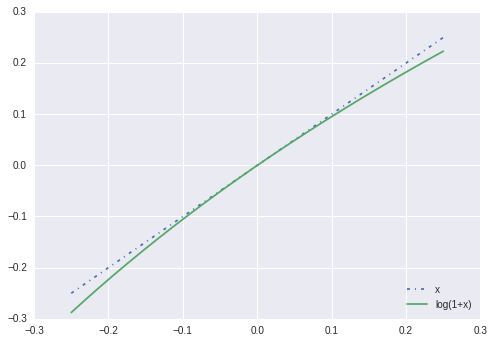

In [2]:
# Fig 2.1
def draw():
    x = np.linspace(-0.25,0.25,300)
    plt.plot(x,x,linestyle='dashdot', label='x')
    plt.plot(x,np.log(1+x),linestyle='solid', label='log(1+x)')
    plt.legend(loc='lower right')
draw();

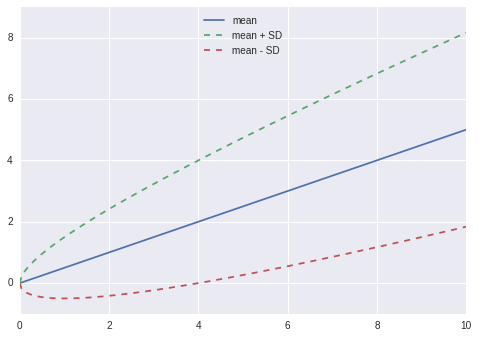

In [3]:
# Fig 2.2
def draw():
    x = np.linspace(0,10,300)
    S0 = 0
    mu = 0.5
    sigma = 1
    plt.plot(x,mu*x,linestyle='solid',label='mean')
    plt.plot(x,mu*x+sigma*np.sqrt(x),linestyle='dashed', label='mean + SD')
    plt.plot(x,mu*x-sigma*np.sqrt(x),linestyle='dashed', label='mean - SD')
    plt.legend(loc='upper center')
draw()

<h3> R Lab (in python) </h3>

In [4]:
dat = pd.read_csv('../data/Stock_FX_Bond.csv')
dat['Date'] = pd.to_datetime(dat['Date'])
dat.head()

,Date,GM_Volume,GM_AC,F_Volume,F_AC,UTX_Volume,UTX_AC,CAT_Volume,CAT_AC,MRK_Volume,...,S&P_Volume,1 year Treasury Constant Maturity Rate,3-Year Treasury Constant Maturity Rate,10 year Treasury Constant Maturity Rate,30 year Treasury Constant Maturity Rate,Aaa Bond Yield,Baa Bond Yield,$/Euro,Yen/$,Brazil Real/$
0,1987-01-02,922200,11.45,2540100,2.31,1130400,3.66,1218400,3.38,14454000,...,91880000,5.86,6.48,7.18,7.44,8.49,9.97,NaN,158.25,NaN
1,1987-01-05,2100000,11.73,8670000,2.40,3032800,3.70,1752000,3.48,11538000,...,181900000,5.85,6.41,7.08,7.35,8.44,9.90,NaN,159.40,NaN
2,1987-01-06,2720000,11.77,6992000,2.43,6614400,3.74,1206400,3.48,14279400,...,189300000,5.85,6.42,7.08,7.36,8.41,9.86,NaN,158.78,NaN
3,1987-01-07,2000400,11.83,7621200,2.53,4233600,3.78,2188000,3.45,13003200,...,190900000,5.78,6.37,7.05,7.33,8.40,9.82,NaN,158.05,NaN
4,1987-01-08,2460000,11.66,5807500,2.51,3816800,3.82,2195200,3.44,16320600,...,194500000,5.78,6.36,7.04,7.31,8.37,9.76,NaN,158.23,NaN


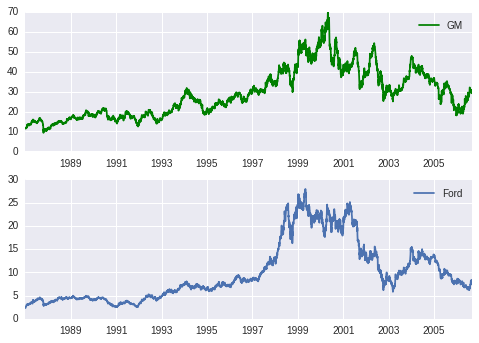

In [5]:
def draw():
    plt.figure(1)
    plt.subplot(211)
    plt.plot(dat['Date'],dat['GM_AC'], color='g', label='GM')
    plt.legend()
    plt.subplot(212)
    plt.plot(dat['Date'],dat['F_AC'], label='Ford')
    plt.legend()
draw()


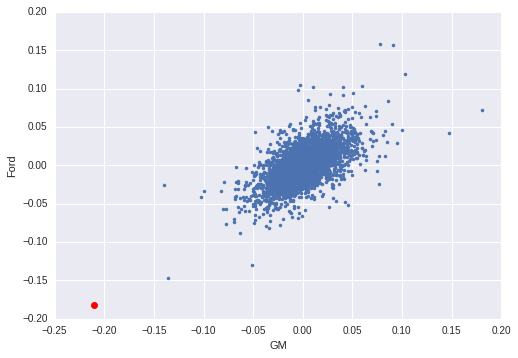

In [6]:
GMReturn = dat['GM_AC'].pct_change()[1:]
FReturn = dat['F_AC'].pct_change()[1:]
plt.plot(GMReturn,FReturn, '.')
plt.plot(min(GMReturn),min(FReturn),'ro')
plt.xlabel('GM')
plt.ylabel('Ford');

**Problem 1** <br>
*Do the GM and Ford returns seem positively correlated?*<br>
Yes, the returns are highly positively corrleated.

*Do you notice any outlying returns? If "yes," do outlying GM Returns seem to occur with outlying Ford returns?* <br>
That depends on how you want to define 'outlier'. The red dot is certainly 'far' from the rest of the data and would constitute an outlier if looking at either GM or Ford returns individually. However if you were regressing one set of returns onto the other, the error would not be particularly large. 

One thing to notice is that the individual outliers on the upside (10+%) seem to occur more independently than outliers to the downside.

In [7]:
GM_log_returns = np.log(dat['GM_AC']).diff()[1:]
F_log_returns = np.log(dat['F_AC']).diff()[1:]

**Problem 2** <br>
*Compute the log returns for Gm and plot the returns versus the log returns? How highly correlated are the two types of returns?*

The correlation coefficient is 0.99954


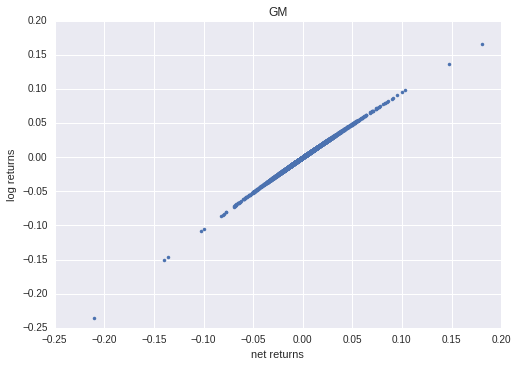

In [8]:
plt.plot(GMReturn,GM_log_returns,'.')
plt.xlabel('net returns')
plt.ylabel('log returns')
plt.title('GM');
print("The correlation coefficient is {:.5f}".format(np.corrcoef(GMReturn,GM_log_returns)[1][0]))

Suppose a hedge fund owns \$1,000,000 of stock and used \$50,000 of its own capital. The daily log returns on the stock have a mean of 0.05/year and a standard deviation of 0.23/year. Assume the trading year has 253 days.

**Problem 3** <br>
What is the probability that the value of the stock will be below \$950,000 at the close of at least one of the next 45 trading days?  Use simulation to answer the question.

In [9]:
#running it exactly like in the book
def run_experiment():
    niter = 1e5
    below = np.repeat(0,niter)
    mu = 0.05/253
    sigma = 0.23/np.sqrt(253)
    for i in range(int(niter)):
        r = np.random.normal(loc=mu, scale=sigma, size=45)
        logPrice = np.log(1e6) + r.cumsum()
        below[i] = int(min(logPrice) < np.log(950000))
    return below.mean()
print("This trade will be stopped out {:.2f}% of the time".format(run_experiment()*100))

This trade will be stopped out 50.84% of the time


Suppose the hedge fund will sell always take a profit of at least \$100,000, a loss of $50,000, or sell the stock at the end of 100 trading days.

From the wording, I believe we are supposed to assume the stop-loss and take-profit transactions occur 'on-the-mark'

In [10]:
def sim():
    # runs a single simulation and 
    # returns the tuple (profit, day)
    # where r is the return on the final step if it was stopped out else 0
    value = np.log(1e6)
    take_profit = np.log(1100000)
    stop_loss = np.log(950000)
    mu = 0.05/253
    sigma = 0.23/np.sqrt(253)
        
    # At each iteration, update the log_value, check if it's stopped out
    for i,r in enumerate(np.random.normal(loc=mu,scale=sigma,size=100)):
        value += r
        if value >= take_profit:
            return 100000,i+1
        if value <= stop_loss:
            return -50000, i+1
    return np.exp(value) - 1e6 ,100

In [11]:
results = [sim() for _ in range(int(1e5))]
profits = np.array([p for p,_ in results])

In [12]:
# Problem 4 What is the probability that the hedge fund will make  aprofit of at least $100,000
print("The probability that the hedge fund will make a profit of at least $100,000 is {:.2f}%".format(100*(profits == 100000).mean()))

The probability that the hedge fund will make a profit of at least $100,000 is 39.18%


In [13]:
# Problem 5 What is the probability that the hedge fund will suffer a loss?
print("The probability that the hedge fund will suffer a loss is {:.2f}%".format(100*(profits < 0).mean()))

The probability that the hedge fund will suffer a loss is 59.09%


In [14]:
# Problem 6 What is the expected profit from this trading strategy?
print("The expected profit is ${:.2f}".format(profits.mean()))

The expected profit is $10581.88


In [15]:
# Problem 7 What is the expected return?
investment = 50000
leveraged_returns = np.array([p/investment/t for p,t in results])
print("The annual expected return is {:.2f}%".format(100* leveraged_returns.mean()))

The annual expected return is -1.66%


<p> 1. The daily log returns on a stock are independnt and normally distributed with a mean 0.001 and standard deviation 0.015. Suppose you buy \$1000  worth of this stock. </p>
(a) What is the probability that after one trading day your investment  is worth less than \$990? <br>
(b) What is the probability that after five trading days your investment is worth less than \$990?

Remembering that $P_k = P_0e^{r_t(k)}$
$$ \mathrm P \left(P_k < 990 \right) = \mathrm P \left( 1000e^{r_t(k)} < 990 \right) = \mathrm P \left( r_t(k) < log \left(\frac{990}{1000} \right) \right)$$

And since $r_t(k)$ is just the sum of $k$ i.i.d normals we know <br>
$r_1(1) ~ \mathcal N \left( 0.001, 0.015^2 \right)$ <br>
$r_5(5) ~ \mathcal N \left(5(0.001), 5(0.015^2) \right)$

In [16]:
from scipy.stats import norm

print("Answer for a: {:.2f}%".format(100*norm.cdf(np.log(990/1000),loc= 0.001, scale = 0.015)))
print("Answer for b: {:.2f}%".format(100*norm.cdf(np.log(990/1000),loc= 0.005, scale = np.sqrt(5)*0.015)))

Answer for a: 23.07%
Answer for b: 32.68%


<p> 3. Suppose the price of a stock at times 1, 2, and 3 are $P_1 = 95$, $P_2$ = 103, and $P_3 = 98$. Find $r_3(2)$ </p>

So being consistent with our notation
$$ r_3(2) = r_3 + r_2 = (p_3 - p_2) + (p_2 - p_1) = p_3 - p_1 = log(98) - log(95)$$

In [18]:
# More solutions available on request.

In [19]:

# If you'd like a refresher on the log-normal distribution and/or derived distributions, I suggest
# this video https://www.youtube.com/watch?v=cLFcqKHT1uY